# Introduction

Theme 2: Healthcare
https://www.kaggle.com/gpreda/covid-world-vaccination-progress
* Q1: Which country has the highest & lowest % of population vaccinated?
* Q2: Is there any correlation between the number of population vaccinated vs international borders relaxing? 

Next week, you will present your solution + reasons in a 3-slide presentation to any one of the themes you have chosen above. Maximum presentation time is 5 minutes, tops!

# Initialize

In [1]:
# Mount the drive folder
from google.colab import drive # to load data from google drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Load libraries
import os # For files operations
import urllib.request # For download from url
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # ploting the data
import seaborn as sns # ploting the data
import csv # to import data in txt files

In [3]:
# Set up color blind friendly color palette
# The palette with grey:
cbPalette = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
# The palette with black:
cbbPalette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

# sns.palplot(sns.color_palette(cbPalette))
# sns.palplot(sns.color_palette(cbbPalette))

sns.set_palette(cbPalette)
#sns.set_palette(cbbPalette)

In [4]:
# Seaborn favourite plot shortcuts
def boxplot(data, x, y, title = ""):
    
    """
    This function generates a seaborn boxplot with my defaults parameters.

    Parameters:
        title (string) title of the plot, default is empty
        data (df) the data frame
        x (panda serie) the x axis
        y (panda serie) the y axis
    """

    f, ax = plt.subplots(figsize=(8, 6))
    sns.boxplot(x=x, y=y, data=data, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
    plt.title(title)
    plt.ioff()

def countplot(data, variable, title = ""):
    """
    This function contains my favourite parameters for the seaborn coutplot plot
    """

    f, ax = plt.subplots(figsize=(8, 6))
    sns.countplot(data=data, x=variable)
    plt.title(title)
    plt.ioff()

In [5]:
# Set up the path for the data and output folders to the challenge and list files
PATH = "/content/drive/MyDrive/Data_science/DSAK"
data_dir = PATH + "/Data"
output_dir = PATH + "/Output"
os.listdir(data_dir)

['population_by_country_2020.csv',
 'country_vaccinations.csv',
 'country_vaccinations_by_manufacturer.csv',
 'Copy of country_vaccinations.csv',
 'Untitled document.gdoc',
 'Border_status.csv']

# Q1: Which country has the highest and lowest percentage of population vaccinated?

## Using the manufacturer dataset

In [6]:
file = data_dir + "/" + "country_vaccinations_by_manufacturer.csv"
vaccine_manufacturer = pd.read_csv(file, sep = ',', encoding = 'UTF-8')
vaccine_manufacturer .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7724 entries, 0 to 7723
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            7724 non-null   object
 1   date                7724 non-null   object
 2   vaccine             7724 non-null   object
 3   total_vaccinations  7724 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 241.5+ KB


In [7]:
vaccine_manufacturer.head()

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,30899
4,Austria,2021-01-15,Johnson&Johnson,0


In [8]:
# Compute the total of vaccine for each country by location
vaccine_manufacturer .rename(columns={'location': 'Country'}, inplace=True)
df = vaccine_manufacturer .groupby(['Country'])[['total_vaccinations']].max()
df.head()

,total_vaccinations
Country,
Austria,5099182
Belgium,6791828
Bulgaria,949706
Chile,17021648
Croatia,1454685


In [9]:
# Combine with the world population dataset

file = data_dir + "/" + "population_by_country_2020.csv"
population = pd.read_csv(file, sep = ',', encoding = 'UTF-8')
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB


In [10]:
population.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


In [11]:
df2 = population[['Country (or dependency)', 'Population (2020)', 'Med. Age', 'Urban Pop %', 'World Share']].copy()

df2.rename(columns={'Country (or dependency)': 'Country'}, inplace=True)
df2.rename(columns={'Population (2020)': 'Population'}, inplace=True)
df2.rename(columns={'Med. Age': 'Median_age'}, inplace=True)
df2.rename(columns={'Urban Pop %': 'Urban_pop_percentage'}, inplace=True)

df2.head()

,Country,Population,Median_age,Urban_pop_percentage,World Share
0,China,1440297825,38,61 %,18.47 %
1,India,1382345085,28,35 %,17.70 %
2,United States,331341050,38,83 %,4.25 %
3,Indonesia,274021604,30,56 %,3.51 %
4,Pakistan,221612785,23,35 %,2.83 %


In [12]:
vaccine_manufacturer.Country.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Chile', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'United States', 'Uruguay'], dtype=object)

In [13]:
vaccine_manufacturer = vaccine_manufacturer.groupby(["Country"])["total_vaccinations"].max()
vaccine_manufacturer.head()

Country
Austria      5099182
Belgium      6791828
Bulgaria      949706
Chile       17021648
Croatia      1454685
Name: total_vaccinations, dtype: int64

In [14]:
# Combine the datasets
# The UK was lost in the process. I would beed to check that the countries names
# corresponds in both datasets

merged = pd.merge(vaccine_manufacturer, df2, on = "Country")
merged.head()

,Country,total_vaccinations,Population,Median_age,Urban_pop_percentage,World Share
0,Austria,5099182,9015361,43,57 %,0.12 %
1,Belgium,6791828,11598451,42,98 %,0.15 %
2,Bulgaria,949706,6939018,45,76 %,0.09 %
3,Chile,17021648,19144605,35,85 %,0.25 %
4,Croatia,1454685,4100719,44,58 %,0.05 %


In [15]:
# Add a new column percentage of population vaccinated
# percentage_vaccinated = total_vaccinations/Population * 100

merged["percentage_vaccinated"] = merged["total_vaccinations"] / merged["Population"] * 100
merged.head()

,Country,total_vaccinations,Population,Median_age,Urban_pop_percentage,World Share,percentage_vaccinated
0,Austria,5099182,9015361,43,57 %,0.12 %,56.561041
1,Belgium,6791828,11598451,42,98 %,0.15 %,58.558061
2,Bulgaria,949706,6939018,45,76 %,0.09 %,13.686461
3,Chile,17021648,19144605,35,85 %,0.25 %,88.910939
4,Croatia,1454685,4100719,44,58 %,0.05 %,35.473901


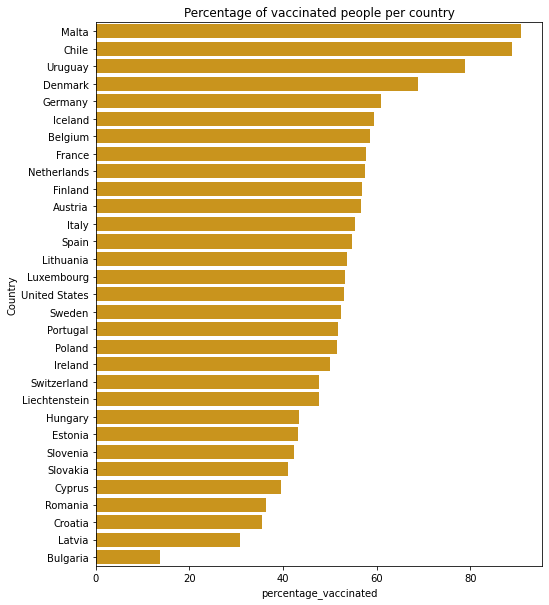

In [16]:
# Plot percentage of vaccinated people per country
# https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/

title = 'Percentage of vaccinated people per country'
data = merged.copy()
#data.sort_values(by=['percentage_vaccinated']).reset_index()
y = "Country"
x = "percentage_vaccinated"

f, ax = plt.subplots(figsize=(8, 10))
sns.barplot(x=x, y=y, data=data, color = "#E69F00",
            order=data.sort_values('percentage_vaccinated', ascending=False).Country)
plt.title(title)
plt.ioff()

After looking closely at the data set it appear that many countries, such as the UK, are missing from this dataset. 

## Using the vaccine dataset

In [46]:
file = data_dir + "/" + "country_vaccinations.csv"
vaccine = pd.read_csv(file, sep = ',', encoding = 'UTF-8')
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26552 entries, 0 to 26551
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              26552 non-null  object 
 1   iso_code                             26552 non-null  object 
 2   date                                 26552 non-null  object 
 3   total_vaccinations                   14893 non-null  float64
 4   people_vaccinated                    14110 non-null  float64
 5   people_fully_vaccinated              11383 non-null  float64
 6   daily_vaccinations_raw               12298 non-null  float64
 7   daily_vaccinations                   26277 non-null  float64
 8   total_vaccinations_per_hundred       14893 non-null  float64
 9   people_vaccinated_per_hundred        14110 non-null  float64
 10  people_fully_vaccinated_per_hundred  11383 non-null  float64
 11  daily_vaccinations_per_milli

In [47]:
vaccine = vaccine[['country', 'date', 'total_vaccinations', 'people_fully_vaccinated', 'vaccines']]
vaccine.rename(columns={'country': 'Country'}, inplace=True)
vaccine.head()

,Country,date,total_vaccinations,people_fully_vaccinated,vaccines
0,Afghanistan,2021-02-22,0.0,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"
1,Afghanistan,2021-02-23,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"
2,Afghanistan,2021-02-24,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"
3,Afghanistan,2021-02-25,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"
4,Afghanistan,2021-02-26,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech"


In [48]:
vaccine = vaccine.groupby(["Country"])["people_fully_vaccinated"].max()
vaccine.head()

Country
Afghanistan    183762.0
Albania        375629.0
Algeria             NaN
Andorra         24598.0
Angola         513793.0
Name: people_fully_vaccinated, dtype: float64

In [49]:
# Combine the datasets
# The UK was lost in the process. I would beed to check that the countries names
# corresponds in both datasets

merged2 = pd.merge(vaccine, df2, on = "Country")
merged2.head()

,Country,people_fully_vaccinated,Population,Median_age,Urban_pop_percentage,World Share
0,Afghanistan,183762.0,39074280,18,25 %,0.50 %
1,Albania,375629.0,2877239,36,63 %,0.04 %
2,Algeria,NaN,43984569,29,73 %,0.56 %
3,Andorra,24598.0,77287,N.A.,88 %,0.00 %
4,Angola,513793.0,33032075,17,67 %,0.42 %


In [76]:
# Add a new column percentage of population vaccinated
# percentage_vaccinated = total_vaccinations/Population * 100

merged2["percentage_vaccinated"] = merged2["people_fully_vaccinated"] / merged2["Population"] * 100
merged2.head()

,Country,people_fully_vaccinated,Population,Median_age,Urban_pop_percentage,World Share,percentage_vaccinated
0,Afghanistan,183762.0,39074280,18,25 %,0.50 %,0.470289
1,Albania,375629.0,2877239,36,63 %,0.04 %,13.055189
2,Algeria,NaN,43984569,29,73 %,0.56 %,NaN
3,Andorra,24598.0,77287,N.A.,88 %,0.00 %,31.826827
4,Angola,513793.0,33032075,17,67 %,0.42 %,1.555437


In [97]:
# filter country with higher coverage
high_coverage = merged2.loc[(merged2['percentage_vaccinated'] >= 40) & (merged2['percentage_vaccinated'] < 100)]
high_coverage = high_coverage.sort_values(by=['percentage_vaccinated'], ascending=False).reset_index()
high_coverage = high_coverage.head(n=20)

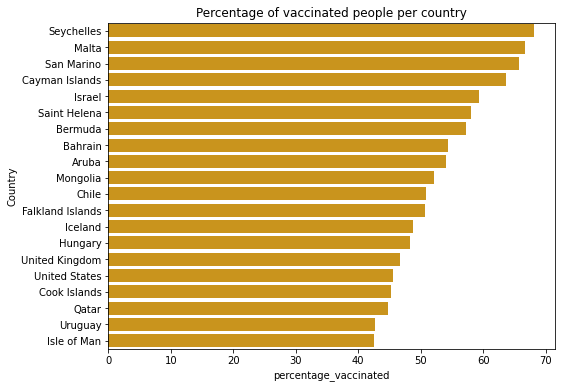

In [98]:
# Plot percentage of vaccinated people per country
# https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/

title = 'Percentage of vaccinated people per country'
data = high_coverage
#data.sort_values(by=['percentage_vaccinated']).reset_index()
y = "Country"
x = "percentage_vaccinated"

f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=x, y=y, data=data, color = "#E69F00",
            order=data.sort_values('percentage_vaccinated', ascending=False).Country)
plt.title(title)
plt.ioff()

In [92]:
# filter country with lower coverage
low_coverage = merged2.loc[(merged2['percentage_vaccinated'] < 5)]
low_coverage = low_coverage.sort_values(by=['percentage_vaccinated'], ascending=True).reset_index()
low_coverage = low_coverage.head(n=20)

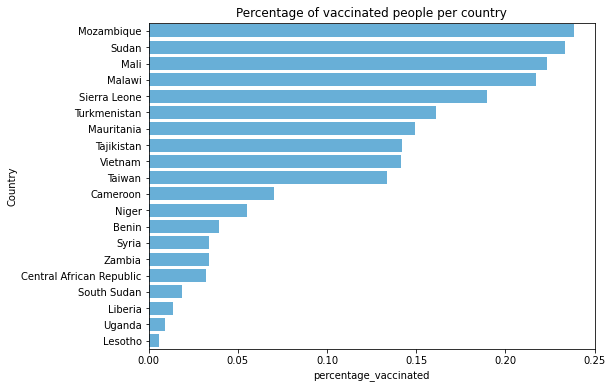

In [99]:
# Plot percentage of vaccinated people per country
# https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/

title = 'Percentage of vaccinated people per country'
data = low_coverage
y = "Country"
x = "percentage_vaccinated"

f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=x, y=y, data=data, color = "#56B4E9",
            order=data.sort_values('percentage_vaccinated', ascending=False).Country)
plt.title(title)
plt.ioff()

# Q2: Is there any correlation between the number of population vaccinated vs international borders relaxing?

For this question we would need a dataset on border relaxing. This is probably hard to find. 

* https://www.kayak.com/travel-restrictions
* https://casinodata.io/

The data was manaully collected form casinodata Sat 26 June 21 art 19:02.

In [ ]:
# Combine with the world population dataset

file = data_dir + "/" + "Border_status.csv"
border = pd.read_csv(file, sep = ',', encoding = 'UTF-8')
border.info()

In [ ]:
# Combine the datasets

df = pd.merge(merged, border, on = "Country")
df.head()

In [ ]:
# Plot numner of vaccine by borders status

title = "Vaccination coverage per border status for tourists"
data = df
x = "Border_status_tourist"
y = "percentage_vaccinated"

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

In [ ]:
# Plot numner of vaccine by borders status

title = "Vaccination coverage per border status for residents"
data = df
x = "Border_status_resident"
y = "percentage_vaccinated"

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()